In [6]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem

#import data from CSV files
employee_data = pd.read_csv("../employee_data/employee_data.csv")
engagement_data = pd.read_csv("../employee_data/employee_engagement_survey_data.csv")


In [7]:
#merge data
merged_data = engagement_data.merge(employee_data, left_on="Employee ID", right_on="EmpID")

#select analysis columns
analysis_data = merged_data[["Work-Life Balance Score", "Satisfaction Score",
                            "Performance Score","DepartmentType"]]

In [8]:
#check for missing data
print(analysis_data["Work-Life Balance Score"].isnull().sum())
print(analysis_data["Satisfaction Score"].isnull().sum())
print(analysis_data["Performance Score"].isnull().sum())
print(analysis_data["DepartmentType"].isnull().sum())


0
0
0
0


In [ ]:
# Obtain the dataset for top performers
top_performer_wl_scores = analysis_data[analysis_data["Performance Score"] == "Exceeds"]["Work-Life Balance Score"]

# Obtain the dataset for everyone else
everyone_else_wl_scores = analysis_data[analysis_data["Performance Score"] != "Exceeds"]["Work-Life Balance Score"]

# Obtain mean for top performers
top_performer_mean_wl_balance = top_performer_wl_scores.mean()

# Obtain mean for everyone else
everyone_else_mean_wl_balance = everyone_else_wl_scores.mean()

# Print means
print(f"Average Work-Life Balance Score for Top Performers: {top_performer_mean_wl_balance}")
print(f"Average Work-Life Balance Score for everyone else: {everyone_else_mean_wl_balance}")

# Obtain SEM for top performers
top_performer_SEM_wl_balance = sem(top_performer_wl_scores)

# Obtain SEM for everyone else
everyone_else_SEM_wl_balance = sem(everyone_else_wl_scores)

# Print SEM values
print(f"SEM for Top Performers: {top_performer_SEM_wl_balance}")
print(f"SEM for Everyone Else: {everyone_else_SEM_wl_balance}")

Average Work-Life Balance Score for Top Performers: 2.956639566395664
Average Work-Life Balance Score for everyone else: 2.993538578487267
SEM for Top Performers: 0.07124739835037755
SEM for Everyone Else: 0.027589182512030595


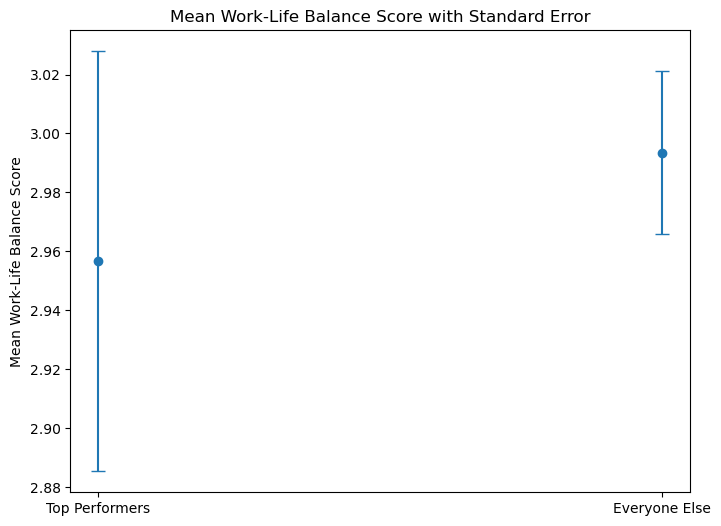

In [ ]:
# Define x-axis positions
x_axis = [1, 2]
means = [top_performer_mean_wl_balance, everyone_else_mean_wl_balance]
standard_errors = [top_performer_SEM_wl_balance, everyone_else_SEM_wl_balance]

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create error bar
ax.errorbar(x_axis, means, standard_errors, fmt="o", capsize=5)

# Set x-axis labels
ax.set_xticks(x_axis)
ax.set_xticklabels(["Top Performers", "Everyone Else"])

# Set axis labels and title
ax.set_ylabel("Mean Work-Life Balance Score")
ax.set_title("Mean Work-Life Balance Score with Standard Error")

# Show plot
plt.show()

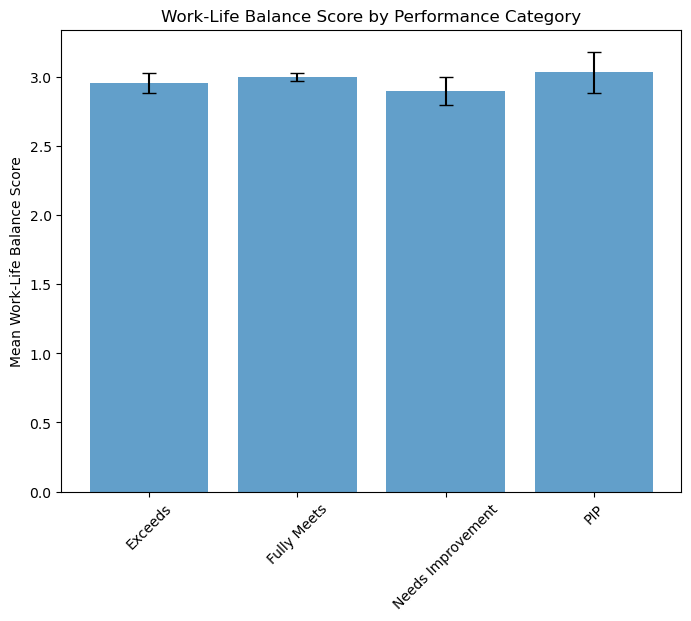

In [17]:
# Calculate mean work-life balance score for each performance category
performance_wl_means = analysis_data.groupby("Performance Score")["Work-Life Balance Score"].mean()
performance_wl_sems = analysis_data.groupby("Performance Score")["Work-Life Balance Score"].apply(sem)

# Define x-axis positions
x_labels = performance_wl_means.index
x_positions = range(len(x_labels))

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create bar chart with error bars
ax.bar(x_positions, performance_wl_means, yerr=performance_wl_sems, capsize=5, alpha=0.7)

# Set x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=45)

# Set axis labels and title
ax.set_ylabel("Mean Work-Life Balance Score")
ax.set_title("Work-Life Balance Score by Performance Category")

# Show plot
plt.show()


In [18]:
# Obtain dataset for Software Engineers
software_engineer_satisfaction_scores = analysis_data[analysis_data["DepartmentType"] == "Software Engineering"]["Satisfaction Score"]

# Obtain dataset for everyone else
everyone_else_satisfaction_scores = analysis_data[analysis_data["DepartmentType"] != "Software Engineering"]["Satisfaction Score"]

# Obtain mean for Software Engineers
software_engineer_mean_satisfaction = software_engineer_satisfaction_scores.mean()

# Obtain mean for everyone else
everyone_else_mean_satisfaction = everyone_else_satisfaction_scores.mean()

# Print means
print(f"Average Satisfaction Score for Software Engineers: {software_engineer_mean_satisfaction}")
print(f"Average Satisfaction Score for everyone else: {everyone_else_mean_satisfaction}")

# Obtain SEM for Software Engineers (Pass full dataset, not the mean)
software_engineer_SEM_satisfaction = sem(software_engineer_satisfaction_scores)

# Obtain SEM for everyone else (Pass full dataset, not the mean)
everyone_else_SEM_satisfaction = sem(everyone_else_satisfaction_scores)

# Print SEM values
print(f"SEM for Software Engineers: {software_engineer_SEM_satisfaction}")
print(f"SEM for Everyone Else: {everyone_else_SEM_satisfaction}")

Average Satisfaction Score for Software Engineers: 3.1130434782608694
Average Satisfaction Score for everyone else: 3.0183708838821492
SEM for Software Engineers: 0.13403621981167693
SEM for Everyone Else: 0.02621057654319158


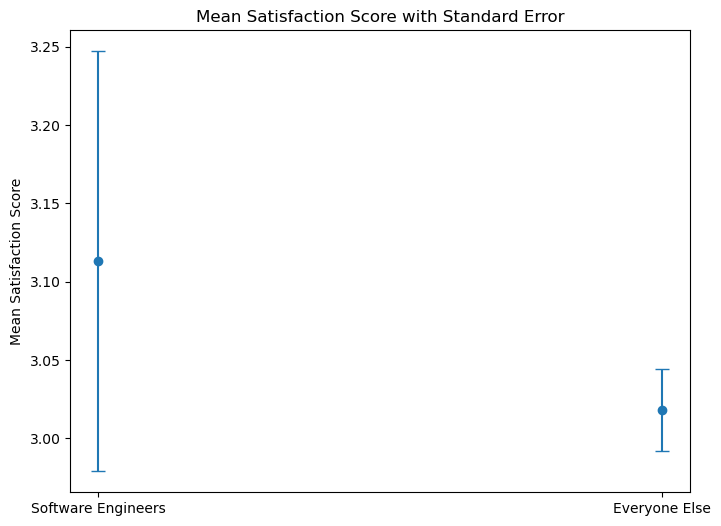

In [19]:
# Define x-axis positions
x_axis = [1, 2]
means = [software_engineer_mean_satisfaction, everyone_else_mean_satisfaction]
standard_errors = [software_engineer_SEM_satisfaction, everyone_else_SEM_satisfaction]

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create error bar
ax.errorbar(x_axis, means, standard_errors, fmt="o", capsize=5)

# Set x-axis labels
ax.set_xticks(x_axis)
ax.set_xticklabels(["Software Engineers", "Everyone Else"])

# Set axis labels and title
ax.set_ylabel("Mean Satisfaction Score")
ax.set_title("Mean Satisfaction Score with Standard Error")

# Show plot
plt.show()

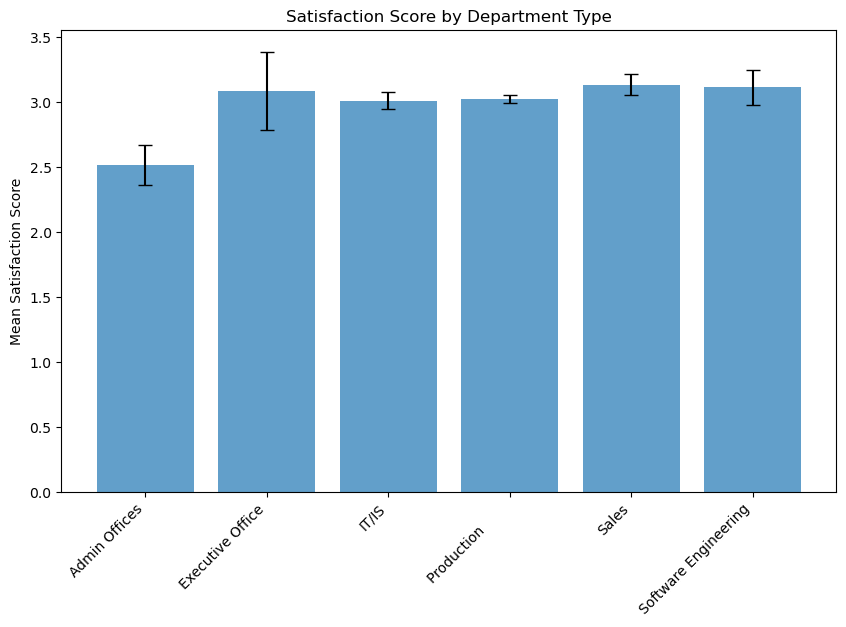

In [20]:
# Calculate mean satisfaction score for each department type
department_satisfaction_means = analysis_data.groupby("DepartmentType")["Satisfaction Score"].mean()
department_satisfaction_sems = analysis_data.groupby("DepartmentType")["Satisfaction Score"].apply(sem)

# Define x-axis positions
x_labels = department_satisfaction_means.index
x_positions = range(len(x_labels))

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar chart with error bars
ax.bar(x_positions, department_satisfaction_means, yerr=department_satisfaction_sems, capsize=5, alpha=0.7)

# Set x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=45, ha="right")

# Set axis labels and title
ax.set_ylabel("Mean Satisfaction Score")
ax.set_title("Satisfaction Score by Department Type")

# Show plot
plt.show()
